In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats

%matplotlib inline

## 실습

### 정규분포

In [3]:
mu  = 175
sigma = 5
x = 180
prob2 = stats.norm.cdf(x, mu, sigma)
print("{0}인 나의 키의 범위: {1:.1f}%".format(x, (1-prob2)*100))

180인 나의 키의 범위: 15.9%


In [4]:
mu = 12
sigma = 3
x1 = 15
x2 = 9

prob1 = stats.norm.cdf(x1, mu, sigma)
prob2 = stats.norm.cdf(x2, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률: {2:.1f}%".format(x2, x1,(prob1-prob2)*100))
print("{0}km 이상 달릴 확률: {1:.1f}%".format(x1,(1-prob1)*100))

9km 이상 15km 이하를 달릴 확률: 68.3%
15km 이상 달릴 확률: 15.9%


### t분포

In [80]:
t = 2.0
df = 100

prob = stats.t.cdf(t, df) # t분포, t값과 자유도
print("P(T<=t): {:.3f}".format(prob))

# 확률변수 t가 2이고 자유도가 100일 때 T<=t일 확률은 0.975이다.

P(T<=t): 0.976


### 카이제곱분포

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

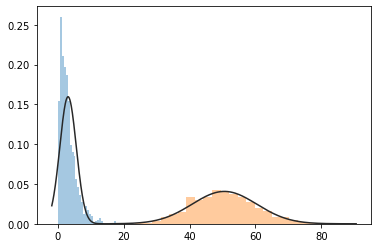

In [82]:
np.random.seed(seed = 1234)
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
chisq_df50 = np.random.chisquare(df = 50, size = 1000)

sns.distplot(chisq_df3, fit = stats.norm, kde = False)
sns.distplot(chisq_df50, fit = stats.norm, kde = False)

# 자유도가 변함에 따라 점점 정규분포와 유사한 모양을 그리게 된다.

In [85]:
chisq = 3
df = 8

prob = stats.chi2.cdf(chisq, df)
print("P(X<=x^2): {:.4f}".format(prob))

# 학률변수 X^2 값이 3.0일 때 자유도가 8인 X^2분포에서 X<=x^2일 확률은 6.5%이다.

P(X<=x^2): 0.0656


### F분포

In [86]:
f = 1.5
dfnum = 10
dfnum2 = 100
prob = stats.f.cdf(x=f, dfn = dfnum, dfd=dfnum2)
print("P(X<=F):{:.3f}".format(prob))

# 자유도가 10, 100인 F분포에서 F값이 1.5일 떄 P(X<=F)는 85%이다.

P(X<=F):0.850


### 와이블 분포

In [21]:
x = 2500
alpha = 5.2
beta = 2200
prob = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>=x): {:.1f}% ".format((1-prob)*100))

## 이 제품이 2500시간 이상 작동할 확률은 14.3%이다.

P(X>=x): 14.3% 


### 이항 분포

In [88]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i, prob))
    
# 5대 차량의 불량대수가 각각 0, 1, 2, 3, 4, 5대가 나올 확률은 아래와 같다.
# 불량대수가 2대가 나올 확률이 가장 높다.

P(X=0) = 0.078
P(X=1) = 0.259
P(X=2) = 0.346
P(X=3) = 0.230
P(X=4) = 0.077
P(X=5) = 0.010


### 포아송분포

In [89]:
mu = 3
prob = stats.poisson.pmf(2, mu)
cdf_prob = stats.poisson.cdf(1, mu)
cdf_prob2 = stats.poisson.cdf(2, mu)
print("2명의 손님이 도착할 확률: {:.1f}%".format(prob*100))
print("1명 이하의 손님이 도착할 확률: {:.1f}%".format(cdf_prob*100))
print("3명 이상의 손님이 도착할 확률: {:.1f}%".format((1-cdf_prob2)*100))

# 한 상점에서 1시간 내에 손님이 1명 이하의 손님이 방문할 확률은 19.9%이고,
# 2명의 손님이 방문할 확률은 22.4%
# 3명 이상의 손님이 도착할 확률은 57.5%이다

2명의 손님이 도착할 확률: 22.4%
1명 이하의 손님이 도착할 확률: 19.9%
3명 이상의 손님이 도착할 확률: 57.7%


### 정규성 검정 

In [66]:
ds_mat = pd.read_csv("./Data/2sample_t_test.csv",engine = "python")
ds_mat

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [63]:
statistic, p = stats.shapiro(ds_mat['Mat_A'])
print("Shapiro-Wilk Test: statistic = {}, p-value={}".format(statistic, p))

# 데이터 셋의 Nan 데이터가 있기 때문에 나올 수 없는 값이 나온다.

Shapiro-Wilk Test: statistic = nan, p-value=1.0


In [90]:
statistic, p = stats.shapiro(ds_mat['Mat_A'][:10])
print("Shapiro-Wilk Test: statistic = {}, p-value={}".format(statistic, p))

# P-value = 0.25이기 때문에 'Mat_A'는 H_0(귀무가설)을 따른다.

Shapiro-Wilk Test: statistic = 0.9062636494636536, p-value=0.2562994360923767


In [91]:
statistic, p = stats.shapiro(ds_mat['Mat_B'][:10])
print("Shapiro-Wilk Test: statistic = {}, p-value={}".format(statistic, p))
# P-value = 0.91이기 때문에 'Mat_B'는 H_0(귀무가설)을 따른다.

Shapiro-Wilk Test: statistic = 0.9729753732681274, p-value=0.9169777035713196


## 모평균 추정(표준편차 아는 경우)
- 정규분포 사용한다.

In [75]:
df = pd.DataFrame({'Sample': [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 
                              22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

In [76]:
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), 
                                   scale = 3.8/np.sqrt(len(df)))
print("신뢰구간: ({},{})".format(lower.round(2), upper.round(2)))

# 평균 무게에 대한 95%의 신뢰구간은 17.83 ~ 21.17이다.

신뢰구간: ([17.83],[21.17])


## 모평균 추정(표준편차 모르는 경우)
- t분포 사용한다.

In [77]:
df = pd.DataFrame({'Sample': [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 
                             70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
np.mean(df)

Sample    71.5
dtype: float64

In [78]:
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), 
                                   scale = stats.sem(df)) # s/ sqrt(n)
print("신뢰구간: ({},{})".format(lower.round(2), upper.round(2)))

# 모평균값 70kg/mm^2의 95% 신뢰구간 은 70.6 ~ 72.4이다.

신뢰구간: ([70.6],[72.4])


### 모분산 신뢰구간 추정

![](./img_1.jpg)

### 모비율 신뢰구간 추정
![](./img_2.jpg)